<a href="https://colab.research.google.com/github/saahil-jain/Covid_19_predictor/blob/master/AmericaLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import re
import os
import numpy
import pandas as pd
from matplotlib import pyplot as plt
print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

Using TensorFlow backend.


/content
Cloning into 'Covid_19_predictor'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 13), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content/Covid_19_predictor
Already up to date.


In [0]:
df=pd.read_csv("data.csv")
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
country_wise_cases=dict()
country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 5, 5, 5, 5, 6, 7, 8, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 16, 35, 35, 35, 53, 53, 59, 60, 66, 69, 89, 103, 125, 159, 233, 338, 433, 554, 754, 1025, 1312, 1663, 2174, 2951, 3774, 4661, 6427, 9415, 14250, 19624, 26747, 35206, 46442, 55231, 69194, 85991, 104686, 124665, 143025, 164620, 189618, 216721, 245540, 277965, 312237, 337635, 368196, 398809, 432132, 466033, 501560, 529951, 557571, 582594, 609516, 639664, 671331, 702164, 735086, 759687, 787752, 825041, 842629, 869172, 890524, 939053, 965910, 988451, 1012583, 1039909, 1069826, 1103781, 1133069, 1158041, 1180634, 1204475, 1228603, 1256972, 1283929, 1309541, 1329799, 1347916, 1369964, 1390746, 1417889, 1443397, 1467884, 1486757, 1508598, 1528568, 1551853, 1577287]


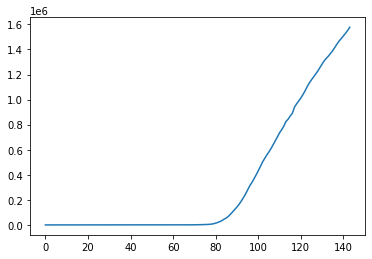

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 9, 11, 12, 14, 17, 21, 26, 28, 30, 40, 47, 57, 69, 85, 108, 150, 150, 260, 340, 471, 590, 801, 1050, 1296, 1707, 2191, 2509, 3170, 4079, 5138, 6053, 7157, 8501, 9647, 10989, 12895, 14817, 16690, 18777, 20608, 22108, 23649, 26057, 30985, 33284, 37054, 38910, 40682, 42539, 45063, 46784, 49963, 51017, 53189, 54876, 56245, 58355, 60966, 63006, 65068, 66385, 67682, 68934, 71078, 73431, 75670, 77180, 78794, 79528, 80684, 82387, 84133, 85906, 87568, 88754, 89562, 90353, 91921, 93439, 94702]


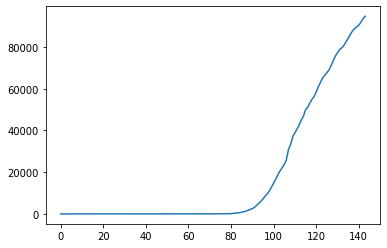

In [4]:
cumulative_country_wise_cases=dict()
cumulative_country_wise_deaths=dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  total_days = len(country_wise_deaths[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)

for country in countries:
  if country == 'United_States_of_America':
    print(cumulative_country_wise_cases[country])
    graph=plt.plot(cumulative_country_wise_cases[country])
plt.show()

for country in countries:
  if country == 'United_States_of_America':
    print(cumulative_country_wise_deaths[country])
    graph=plt.plot(cumulative_country_wise_deaths[country])
plt.show()

In [5]:
for country in countries:
  if country == 'United_States_of_America':
    america_cases = []
    america_death = []
    total_days = len(country_wise_deaths[country])
    for index in range(total_days):
      america_cases.append(country_wise_cases[country][index])
      america_death.append(country_wise_deaths[country][index])
america_cases.sort()
america_death.sort()

print(america_cases)
print(america_death)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 6, 6, 14, 18, 19, 20, 22, 34, 74, 95, 105, 121, 200, 271, 287, 351, 511, 777, 823, 887, 1766, 2988, 4835, 5374, 7123, 8459, 8789, 11236, 13963, 16797, 17588, 18117, 18360, 18695, 18873, 19970, 19979, 20258, 20782, 21352, 21595, 21841, 22048, 22541, 22593, 23285, 23841, 24128, 24132, 24487, 24601, 24972, 24998, 25023, 25398, 25434, 25508, 25612, 26543, 26857, 26922, 26957, 27103, 27143, 27326, 27620, 28065, 28369, 28391, 28819, 29288, 29917, 30148, 30561, 30613, 30833, 31667, 32425, 32922, 33323, 33901, 33955, 34272, 35527, 37289, 48529]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 5, 7, 10, 10, 12, 16, 23, 42, 80, 110, 119, 131, 211, 246, 249

In [0]:
for i in range(len(america_cases)):
  if(america_cases[i] != 0):
    break
america_cases = america_cases[i:]

In [0]:
X = [x for x in range(len(america_cases))]
X = array(X).reshape(len(america_cases), 1, 1)

In [12]:
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(128, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 128)            66560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.fit(X, america_cases, epochs=2048, validation_split=0.1, verbose=1, batch_size=2)

Train on 90 samples, validate on 10 samples
Epoch 1/2048
90/90 [==============================] - 1s 9ms/step - loss: 328618489.5316 - val_loss: 1266465382.4000
Epoch 2/2048
90/90 [==============================] - 0s 2ms/step - loss: 321615257.9441 - val_loss: 1210233395.2000
Epoch 3/2048
90/90 [==============================] - 0s 2ms/step - loss: 294449756.5966 - val_loss: 1060406348.8000
Epoch 4/2048
90/90 [==============================] - 0s 2ms/step - loss: 242502579.4474 - val_loss: 827823065.6000
Epoch 5/2048
90/90 [==============================] - 0s 2ms/step - loss: 172440372.4309 - val_loss: 542231500.8000
Epoch 6/2048
90/90 [==============================] - 0s 2ms/step - loss: 101305613.1299 - val_loss: 278074316.8000
Epoch 7/2048
90/90 [==============================] - 0s 2ms/step - loss: 49623088.9667 - val_loss: 117896403.2000
Epoch 8/2048
90/90 [==============================] - 0s 2ms/step - loss: 31548177.1653 - val_loss: 76726730.8000
Epoch 9/2048
90/90 [========

In [14]:
for i in range(len(america_cases)):
  test_input = array([i])
  test_input = test_input.reshape((1, 1, 1))
  test_output = model.predict(test_input, verbose=0)
  print(f"train: {america_cases[i]}      test: {test_output[0][0]}    off by = {(abs(test_output[0][0]-america_cases[i])*100)/america_cases[i]}%")

train: 1      test: 1.2030653953552246    off by = 20.30653953552246%
train: 1      test: 1.7984230518341064    off by = 79.84230518341064%
train: 1      test: 2.331010103225708    off by = 133.1010103225708%
train: 1      test: 2.4953384399414062    off by = 149.53384399414062%
train: 1      test: 2.8063087463378906    off by = 180.63087463378906%
train: 1      test: 2.7697548866271973    off by = 176.97548866271973%
train: 1      test: 1.5138802528381348    off by = 51.38802528381348%
train: 1      test: -1.2763829231262207    off by = 227.63829231262207%
train: 1      test: -4.871111869812012    off by = 587.1111869812012%
train: 1      test: -8.189630508422852    off by = 918.9630508422852%
train: 1      test: -10.528168678283691    off by = 1152.8168678283691%
train: 3      test: -11.478436470031738    off by = 482.6145490010579%
train: 3      test: -10.502123832702637    off by = 450.0707944234212%
train: 3      test: -6.860480308532715    off by = 328.6826769510905%
train: 6    

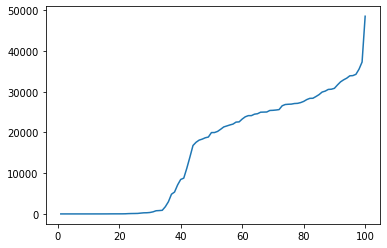

In [15]:
x = [i+1 for i in range(len(america_cases))]
plt.plot(x, america_cases)